In [290]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [291]:
import numpy as np
import scipy as sp
import sklearn as sk
import cartopy as cp
import xarray as xr
import pandas as pd
import cftime
import dateutil
import dask
#Use the 2 lines below if the notebook has a dark theme (to make labelling visible):
from jupyterthemes import jtplot
jtplot.style(theme='grade3', context='notebook', ticks=True, grid=False)
import matplotlib.pyplot as plt
#The following code resets the default plot size so you don't have to fiddle with figsize every time"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 7
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

In [292]:
#Need the following line to avoid hdf5 issues that prevent opening thee file
# https://stackoverflow.com/questions/49317927/errno-101-netcdf-hdf-error-when-opening-netcdf-file
%env HDF5_USE_FILE_LOCKING=FALSE

env: HDF5_USE_FILE_LOCKING=FALSE


# Load and Manipulate Data

In [293]:
#Load AIRI data 
from netCDF4 import Dataset
from datetime import datetime, timedelta
from netCDF4 import num2date, date2num
dataset_file = "pALLIN.nc"
airi_dat = xr.open_dataset(dataset_file, decode_times=False)
units, reference_date = airi_dat.time.attrs['units'].split('since')
airi_dat['time'] = pd.date_range(start=reference_date, periods=airi_dat.sizes['time'], freq='MS')
#This file's calendar isn't recognized when using xr.open_dataset. The above workaround is from: 
#https://stackoverflow.com/questions/55648630/how-to-decode-the-time-variable-while-using-xarray-to-load-a-netcdf-file
# "M" means "month end frequency" (see https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

In [294]:
precip = airi_dat['precip']

In [295]:
#Load SST data
dataset_url = "https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc"
sst_dat = xr.open_dataset(dataset_url)
sst = sst_dat['sst']

In [296]:
#Slice SST data to the same duration as precip and calculate monthly anomalies
sst_subset = sst.sel(time=slice('1871-01-30','2017-01-01'))
sst_clim = sst_subset.groupby('time.month').mean('time')
sst_anomfull = sst_subset.groupby("time.month")-sst_clim
sst_anomfull

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'sst' (time: 1752, lat: 89, lon: 180)>
array([[[1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        [1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       [[1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        [1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       ...,

       [[3.152323e-02, 2.609873e-02, ..., 2.140296e-02, 3.102016e-02],
        [2.697122e-02, 1.542413e-02, ..., 1.046002e-02, 2.427316e-02],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       [[1.788139e-06, 1.788139e-

In [297]:
sst_subset1 = sst_anomfull.sel(time=slice('1900-01-01','1901-12-31'))
sst_subset2 = sst_anomfull.sel(time=slice('1903-01-01','1906-12-31'))
sst_subset3 = sst_anomfull.sel(time=slice('1908-01-01','1911-12-31'))
sst_subset4 = sst_anomfull.sel(time=slice('1913-01-01','1913-12-31'))
sst_subset5 = sst_anomfull.sel(time=slice('1915-01-01','1918-12-31'))
sst_subset6 = sst_anomfull.sel(time=slice('1920-01-01','1921-12-31'))
sst_subset7 = sst_anomfull.sel(time=slice('1923-01-01','1927-12-31'))
sst_subset8 = sst_anomfull.sel(time=slice('1929-01-01','1931-12-31'))
sst_subset9 = sst_anomfull.sel(time=slice('1934-01-01','1939-12-31'))
sst_subset10 = sst_anomfull.sel(time=slice('1941-01-01','1948-12-31'))
sst_subset11 = sst_anomfull.sel(time=slice('1951-01-01','1955-12-31'))
sst_subset12 = sst_anomfull.sel(time=slice('1957-01-01','1958-12-31'))
sst_subset13 = sst_anomfull.sel(time=slice('1960-01-01','1962-12-31'))
sst_subset13 = sst_anomfull.sel(time=slice('1964-01-01','1965-12-31'))
sst_subset14 = sst_anomfull.sel(time=slice('1967-01-01','1971-12-31'))
sst_subset15 = sst_anomfull.sel(time=slice('1973-01-01','1976-12-31'))
sst_subset16 = sst_anomfull.sel(time=slice('1978-01-01','1979-12-31'))
sst_subset17 = sst_anomfull.sel(time=slice('1981-01-01','1982-12-31'))
sst_subset18 = sst_anomfull.sel(time=slice('1984-01-01','1991-12-31'))
sst_subset19 = sst_anomfull.sel(time=slice('1993-01-01','1998-12-31'))
sst_subset20 = sst_anomfull.sel(time=slice('2000-01-01','2002-12-31'))
sst_subset21 = sst_anomfull.sel(time=slice('2004-01-01','2006-12-31'))
sst_subset22 = sst_anomfull.sel(time=slice('2008-01-01','2010-12-31'))
sst_subset23 = sst_anomfull.sel(time=slice('2012-01-01','2015-12-31'))

sst_anomtemp = xr.merge([sst_subset1, sst_subset2, sst_subset3, sst_subset4, sst_subset5, 
                   sst_subset6, sst_subset7, sst_subset8, sst_subset9, sst_subset10, 
                   sst_subset11, sst_subset12, sst_subset13, sst_subset14, sst_subset15, 
                   sst_subset16, sst_subset17, sst_subset18, sst_subset19, sst_subset20, 
                   sst_subset21, sst_subset22, sst_subset23])
#sst_anom = xr.Dataset.to_array(sst_anomtemp).drop('variable')
print(sst_anomtemp)
sst_anom = sst_anomtemp['sst']
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 1056)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    month    (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 8.0 9.0 10.0 11.0 12.0
Data variables:
    sst      (time, lat, lon) float32 1.7881393e-06 1.7881393e-06 ... nan nan


In [298]:
#Load SLP data
dataset_url = "/global/scratch/medhap02/ISMData/prmsl.mon.mean.nc"
slp_dat = xr.open_dataset(dataset_url)
slp = slp_dat['prmsl']

In [299]:
#Slice SLP data to the same duration as precip and calculate monthly anomalies
slp_subset = slp.sel(time=slice('1871-01-01','2015-12-31'))
slp_clim = slp_subset.groupby('time.month').mean('time')
slp_anomfull = slp_subset.groupby("time.month")-slp_clim
slp_anomfull

<xarray.DataArray 'prmsl' (time: 1740, lat: 181, lon: 360)>
array([[[  114.765625,   114.765625, ...,   114.765625,   114.765625],
        [   94.78125 ,    94.46875 , ...,    95.359375,    95.03125 ],
        ...,
        [  293.65625 ,   293.95312 , ...,   293.20312 ,   293.4297  ],
        [  288.66406 ,   288.66406 , ...,   288.66406 ,   288.66406 ]],

       [[   75.84375 ,    75.84375 , ...,    75.84375 ,    75.84375 ],
        [   67.66406 ,    68.02344 , ...,    66.85156 ,    67.24219 ],
        ...,
        [  587.2969  ,   587.52344 , ...,   586.9219  ,   587.0781  ],
        [  581.14844 ,   581.14844 , ...,   581.14844 ,   581.14844 ]],

       ...,

       [[ -876.5703  ,  -876.5703  , ...,  -876.5703  ,  -876.5703  ],
        [ -937.10156 ,  -936.8594  , ...,  -937.625   ,  -937.3906  ],
        ...,
        [-1008.4375  , -1008.8906  , ..., -1007.5625  , -1007.9922  ],
        [-1047.0938  , -1047.0938  , ..., -1047.0938  , -1047.0938  ]],

       [[ -525.5     ,  -525.5

In [300]:
slp_subset1 = slp_anomfull.sel(time=slice('1900-01-01','1901-12-31'))
slp_subset2 = slp_anomfull.sel(time=slice('1903-01-01','1906-12-31'))
slp_subset3 = slp_anomfull.sel(time=slice('1908-01-01','1911-12-31'))
slp_subset4 = slp_anomfull.sel(time=slice('1913-01-01','1913-12-31'))
slp_subset5 = slp_anomfull.sel(time=slice('1915-01-01','1918-12-31'))
slp_subset6 = slp_anomfull.sel(time=slice('1920-01-01','1921-12-31'))
slp_subset7 = slp_anomfull.sel(time=slice('1923-01-01','1927-12-31'))
slp_subset8 = slp_anomfull.sel(time=slice('1929-01-01','1931-12-31'))
slp_subset9 = slp_anomfull.sel(time=slice('1934-01-01','1939-12-31'))
slp_subset10 = slp_anomfull.sel(time=slice('1941-01-01','1948-12-31'))
slp_subset11 = slp_anomfull.sel(time=slice('1951-01-01','1955-12-31'))
slp_subset12 = slp_anomfull.sel(time=slice('1957-01-01','1958-12-31'))
slp_subset13 = slp_anomfull.sel(time=slice('1960-01-01','1962-12-31'))
slp_subset13 = slp_anomfull.sel(time=slice('1964-01-01','1965-12-31'))
slp_subset14 = slp_anomfull.sel(time=slice('1967-01-01','1971-12-31'))
slp_subset15 = slp_anomfull.sel(time=slice('1973-01-01','1976-12-31'))
slp_subset16 = slp_anomfull.sel(time=slice('1978-01-01','1979-12-31'))
slp_subset17 = slp_anomfull.sel(time=slice('1981-01-01','1982-12-31'))
slp_subset18 = slp_anomfull.sel(time=slice('1984-01-01','1991-12-31'))
slp_subset19 = slp_anomfull.sel(time=slice('1993-01-01','1998-12-31'))
slp_subset20 = slp_anomfull.sel(time=slice('2000-01-01','2002-12-31'))
slp_subset21 = slp_anomfull.sel(time=slice('2004-01-01','2006-12-31'))
slp_subset22 = slp_anomfull.sel(time=slice('2008-01-01','2010-12-31'))
slp_subset23 = slp_anomfull.sel(time=slice('2012-01-01','2015-12-31'))

slp_anomtemp = xr.merge([slp_subset1, slp_subset2, slp_subset3, slp_subset4, slp_subset5, 
                   slp_subset6, slp_subset7, slp_subset8, slp_subset9, slp_subset10, 
                   slp_subset11, slp_subset12, slp_subset13, slp_subset14, slp_subset15, 
                   slp_subset16, slp_subset17, slp_subset18, slp_subset19, slp_subset20, 
                   slp_subset21, slp_subset22, slp_subset23])
#slp_anom = xr.Dataset.to_array(slp_anomtemp).drop('variable')
print(slp_anomtemp)
slp_anom = slp_anomtemp['prmsl']
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 1056)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    month    (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 8.0 9.0 10.0 11.0 12.0
Data variables:
    prmsl    (time, lat, lon) float32 24.570312 24.570312 ... -411.48438


In [301]:
#Get precip anomalies
precip_clim = precip.groupby("time.month").mean("time")
precip_anomfull = precip.groupby("time.month") - precip_clim

In [302]:
precip_subset1 = precip_anomfull.sel(time=slice('1900-01-01','1901-12-31'))
precip_subset2 = precip_anomfull.sel(time=slice('1903-01-01','1906-12-31'))
precip_subset3 = precip_anomfull.sel(time=slice('1908-01-01','1911-12-31'))
precip_subset4 = precip_anomfull.sel(time=slice('1913-01-01','1913-12-31'))
precip_subset5 = precip_anomfull.sel(time=slice('1915-01-01','1918-12-31'))
precip_subset6 = precip_anomfull.sel(time=slice('1920-01-01','1921-12-31'))
precip_subset7 = precip_anomfull.sel(time=slice('1923-01-01','1927-12-31'))
precip_subset8 = precip_anomfull.sel(time=slice('1929-01-01','1931-12-31'))
precip_subset9 = precip_anomfull.sel(time=slice('1934-01-01','1939-12-31'))
precip_subset10 = precip_anomfull.sel(time=slice('1941-01-01','1948-12-31'))
precip_subset11 = precip_anomfull.sel(time=slice('1951-01-01','1955-12-31'))
precip_subset12 = precip_anomfull.sel(time=slice('1957-01-01','1958-12-31'))
precip_subset13 = precip_anomfull.sel(time=slice('1960-01-01','1962-12-31'))
precip_subset13 = precip_anomfull.sel(time=slice('1964-01-01','1965-12-31'))
precip_subset14 = precip_anomfull.sel(time=slice('1967-01-01','1971-12-31'))
precip_subset15 = precip_anomfull.sel(time=slice('1973-01-01','1976-12-31'))
precip_subset16 = precip_anomfull.sel(time=slice('1978-01-01','1979-12-31'))
precip_subset17 = precip_anomfull.sel(time=slice('1981-01-01','1982-12-31'))
precip_subset18 = precip_anomfull.sel(time=slice('1984-01-01','1991-12-31'))
precip_subset19 = precip_anomfull.sel(time=slice('1993-01-01','1998-12-31'))
precip_subset20 = precip_anomfull.sel(time=slice('2000-01-01','2002-12-31'))
precip_subset21 = precip_anomfull.sel(time=slice('2004-01-01','2006-12-31'))
precip_subset22 = precip_anomfull.sel(time=slice('2008-01-01','2010-12-31'))
precip_subset23 = precip_anomfull.sel(time=slice('2012-01-01','2015-12-31'))

precip_anom = xr.merge([precip_subset1, precip_subset2, precip_subset3, precip_subset4, precip_subset5, 
                   precip_subset6, precip_subset7, precip_subset8, precip_subset9, precip_subset10, 
                   precip_subset11, precip_subset12, precip_subset13, precip_subset14, precip_subset15, 
                   precip_subset16, precip_subset17, precip_subset18, precip_subset19, precip_subset20, 
                   precip_subset21, precip_subset22, precip_subset23])
precip_anomtemp = xr.Dataset.to_array(precip_anom)
precip_anom = precip_anom['precip']
print(precip_anom)
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.DataArray 'precip' (time: 1056)>
array([ -9.166439,   4.535616,  -5.745206, ..., -44.439735, -40.930824,
        13.444523], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
    month    (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 8.0 9.0 10.0 11.0 12.0


In [303]:
junes = np.arange(5,1056,12)
julys = np.arange(6,1056,12) #1752 instead of 1068
augusts = np.arange(7,1056, 12)
septembers = np.arange(8,1056,12)
precip_june = precip_anom[junes]
precip_july = precip_anom[julys]
precip_august = precip_anom[augusts]
precip_september = precip_anom[septembers]

precip_july.time.data = precip_june.time.data
precip_august.time.data = precip_june.time.data
precip_september.time.data = precip_june.time.data

precip_jjas = (precip_june + precip_july + precip_august + precip_september)

# Building Predictors

In [304]:
#EP-ENSOpredictor

#DSST1
latrange1 = sst_anom.sel(lat = slice(5, -20)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = sst_anom.sel(lat = slice(5, -20), lon = slice(150, 170), time = (sst_anom['time.month']==3))
marchSST1 = marchdata1.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean1 = (marchSST1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = sst_anom.sel(lat = slice(5, -20), lon = slice(150, 170), time = (sst_anom['time.month']==5))
maySST1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean()

marchmean1.time.data = maymean1.time.data
DSST1 = maymean1 - marchmean1

#DSST2
latrange2 = sst_anom.sel(lat = slice(10, -10)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = sst_anom.sel(lat = slice(10, -10), lon = slice(250, 280), time = (sst_anom['time.month']==3))
marchSST2 = marchdata2.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean2 = (marchSST2*weights2).mean({'lon', 'lat'})/weights2.mean()

maydata2 = sst_anom.sel(lat = slice(10, -10), lon = slice(250, 280), time = (sst_anom['time.month']==5))
maySST2 = maydata2.sel(time = slice('1900-05-01', '2015-05-01'))
maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean()

marchmean2.time.data = maymean2.time.data
DSST2 = (maymean2 - marchmean2)

EPTinitial = DSST1 - DSST2
#print(EPTinitial)
EPTstd = EPTinitial.std()
EPTmean = EPTinitial.mean()
EPT = (EPTinitial - EPTmean)/EPTstd

In [305]:
print(EPT)

<xarray.DataArray (time: 88)>
array([-0.087031, -0.349395,  0.952161, -2.207361, -1.112206,  2.42138 ,
        1.067863, -0.055572,  0.374956, -1.817191,  0.379771, -0.832366,
        0.601817, -0.670612, -0.832157,  1.29451 , -0.546239, -0.765166,
        0.272546,  0.120034,  0.200123, -0.150773, -0.787937, -0.841457,
        1.517263,  0.159261, -1.528789, -0.047607,  0.57149 ,  0.927541,
       -1.434518, -0.188932,  2.12384 , -0.464264,  0.123852, -0.708544,
       -0.061771,  1.765358,  2.167504, -0.49596 ,  1.277148, -0.428457,
        1.862247,  0.526277, -1.026932, -0.470538,  2.056401, -1.692724,
       -0.349625, -0.254107, -0.779232,  0.113341, -0.013173,  1.063192,
       -0.792651,  0.983634, -0.862947,  0.71936 , -1.147233,  0.432044,
       -0.780704,  0.746544,  0.637105,  0.563633, -0.09354 ,  0.789095,
        0.220932, -0.381595, -0.322652, -1.073292, -0.43058 ,  1.040161,
        0.635711, -2.153529,  0.793171, -0.580328,  0.267886,  0.76092 ,
        0.679785, -1.

In [306]:
#CP-ENSOpredictor

#DSST1
latrange1 = sst_anom.sel(lat = slice(-10, -25)).lat
weights1 = np.cos(latrange1*np.pi/180)

aprildata1 = sst_anom.sel(lat = slice(-10, -25), lon = slice(170, 200), time = (sst_anom['time.month']==4))
aprilSST1 = aprildata1.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean1 = (aprilSST1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = sst_anom.sel(lat = slice(-10, -25), lon = slice(170, 200), time = (sst_anom['time.month']==5))
maySST1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean() 

aprilmean1.time.data = maymean1.time.data
DSST1 = maymean1 - aprilmean1

#DSST2
latrange2 = sst_anom.sel(lat = slice(20, 5)).lat
weights2 = np.cos(latrange2*np.pi/180)

aprildata2 = sst_anom.sel(lat = slice(20, 5), lon = slice(180, 210), time = (sst_anom['time.month']==4))
aprilSST2 = aprildata2.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean2 = (aprilSST2*weights2).mean({'lon', 'lat'})/weights2.mean()
                          
maydata2 = sst_anom.sel(lat = slice(20, 5), lon = slice(180, 210), time = (sst_anom['time.month']==5))
maySST2 = maydata2.sel(time = slice('1900-05-01', '2015-05-01'))
maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean()
                          
aprilmean2.time.data = maymean2.time.data
DSST2 = maymean2 - aprilmean2

CPTinitial = DSST1 - DSST2
#print(CPTinitial)
CPTstd = CPTinitial.std()
CPTmean = CPTinitial.mean()
CPT = (CPTinitial - CPTmean)/CPTstd

In [307]:
print(CPT)

<xarray.DataArray (time: 88)>
array([ 1.034446, -1.644795,  0.260865, -1.523214, -2.058889,  0.279677,
        0.520603,  1.476613, -2.861686, -0.120737,  1.58951 , -0.388673,
       -0.027112,  2.047418,  0.3757  , -2.200316,  0.330586,  0.319994,
        0.059772, -0.089702,  0.473585,  0.404069, -0.20933 , -0.375415,
        0.049273, -0.243741,  0.289054, -0.338636, -0.127177,  0.813011,
        1.631568, -0.410525,  0.048517,  1.325921,  0.397832, -1.561584,
       -0.733634,  0.632544, -1.80833 , -2.158612,  0.166518, -0.548333,
        0.10629 ,  0.632596,  0.460435,  0.484698,  1.546964, -1.403212,
       -0.420896,  0.689404, -0.674952,  2.048375,  0.677564, -0.983772,
       -0.169912,  0.553684, -0.01093 ,  1.495744,  0.917114, -0.158445,
       -0.07368 , -1.074418, -0.567051, -0.620656, -1.619773, -0.047012,
        0.628906,  2.138351, -0.738455, -0.077431, -0.415636,  0.498731,
       -1.319567, -0.649522,  2.0164  , -1.059239, -0.481311, -0.565523,
        0.49364 ,  0.

In [308]:
#mega-ENSOpredictor

#NPcalculation
latrange1 = slp_anom.sel(lat = slice(-40, -10)).lat
weights1 = np.cos(latrange1*np.pi/180)

aprildata1 = slp_anom.sel(lat = slice(-40, -10), lon = slice(200, 270), time = (slp_anom['time.month']==4))
aprilSLP1 = aprildata1.sel(time=slice('1900-04-01','2015-04-01'))
aprilmean1 = ((aprilSLP1*weights1).mean({'lon', 'lat'})/weights1.mean())

maydata1 = slp_anom.sel(lat = slice(-40, -10), lon = slice(200, 270), time = (slp_anom['time.month']==5))
maySLP1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = ((maySLP1*weights1).mean({'lon', 'lat'})/weights1.mean())

aprilmean1.time.data = maymean1.time.data
NP = ((aprilmean1 + maymean1)/2)

#SPcalculation
latrange2 = slp_anom.sel(lat = slice(10, 30)).lat
weights2 = np.cos(latrange2*np.pi/180)

aprildata2 = slp_anom.sel(lat = slice(10, 30), lon = slice(180, 230), time = (slp_anom['time.month']==4))
aprilSLP2 = aprildata2.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean2 = ((aprilSLP2*weights2).mean({'lon', 'lat'})/weights2.mean())

maydata2 = slp_anom.sel(lat = slice(10, 30), lon = slice(180, 230), time = (slp_anom['time.month']==5))
maySLP2 = maydata2.sel(time = slice('1900-05-01', '2015-05-01'))
maymean2 = ((maySLP2*weights2).mean({'lon', 'lat'})/weights2.mean())

aprilmean2.time.data = maymean2.time.data
SP = ((aprilmean2 + maymean2)/2)

NParea = (30*weights1.mean() * 70)
SParea = (20*weights2.mean() * 50)
PSHinitial = ((NP * NParea) + (SP * SParea))/(NParea + SParea)
#print(PSHinitial)
PSHstd = PSHinitial.std()
PSHmean = PSHinitial.mean()
PSH = (PSHinitial - PSHmean)/PSHstd

In [309]:
print(PSH)

<xarray.DataArray (time: 88)>
array([-2.005250e-01, -5.051098e-01, -6.125665e-01, -1.837063e+00,
       -1.866761e+00, -1.292742e+00, -2.470020e+00, -2.482490e-01,
       -1.102492e+00, -1.361715e+00, -1.361769e+00, -2.118574e+00,
       -1.986200e+00,  3.538084e-01, -5.215671e-01, -2.002871e+00,
       -1.004603e+00, -3.375509e-01, -5.135708e-01, -1.850341e-01,
       -2.298567e-01, -1.507822e-01, -3.283794e-01, -9.261173e-01,
       -6.347694e-01,  3.103731e-02, -8.884090e-01,  8.430255e-02,
        1.217063e-01,  1.566132e+00, -6.575921e-01,  8.822005e-01,
        5.166321e-01, -2.775873e-01,  7.746392e-01,  5.110298e-01,
        2.223698e-01, -1.147085e-01, -7.284263e-01, -1.242188e+00,
       -1.917778e-01, -1.029086e-01, -2.842865e-01,  1.487120e+00,
       -6.584970e-01, -7.160102e-01,  6.213269e-01, -1.220243e-03,
        3.113251e-01, -5.122090e-01, -1.128113e-01,  7.545597e-01,
        5.855645e-01,  1.186979e-01,  7.520196e-01,  7.556060e-01,
        6.702035e-01,  1.321372e

In [310]:
#AnomalousAsianLowpredictor

latrange = slp_anom.sel(lat = slice(40, 60)).lat
weights = np.cos(latrange*np.pi/180)

marchdata = slp_anom.sel(lat = slice(40, 60), lon = slice(95, 125), time = (slp_anom['time.month']==3))
marchSLP = marchdata.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean = ((marchSLP*weights).mean({'lon', 'lat'})/weights.mean())

maydata = slp_anom.sel(lat = slice(40, 60), lon = slice(95, 125), time = (slp_anom['time.month']==5))
maySLP = maydata.sel(time = slice('1900-05-01', '2015-05-01'))
maymean = ((maySLP*weights).mean({'lon', 'lat'})/weights.mean())

marchmean.time.data = maymean.time.data
NATinitial = maymean - marchmean
#print(NATinitial)
NATstd = NATinitial.std()
NATmean = NATinitial.mean()
NAT = (NATinitial - NATmean)/NATstd

In [311]:
print(NAT)

<xarray.DataArray (time: 88)>
array([-1.068893,  0.755654, -0.12527 ,  0.599036, -1.890579, -0.034174,
        0.13958 , -0.239572,  0.238692,  0.437342,  0.731064, -0.502504,
       -1.75183 , -0.134084,  1.291167,  0.963258, -0.115369,  0.992072,
       -1.714047, -0.177566, -0.864392,  0.914149, -0.850064, -0.146981,
        1.098344, -0.23197 ,  0.951411, -2.40728 , -0.407965, -0.562247,
        0.41978 ,  1.46196 ,  1.423092, -0.093212, -0.260565, -0.936379,
        0.20943 , -0.958688,  0.570385,  0.110958,  0.948243,  0.556542,
       -1.239539, -0.332461, -1.195328,  0.850039,  1.538866, -0.598748,
        0.187332,  2.317948, -1.085157, -2.437565, -1.39872 ,  0.21747 ,
       -0.744242,  0.601322, -1.121179,  0.136418,  0.589953,  0.822986,
        0.286184, -0.687328, -1.442452,  0.29634 ,  0.310177, -0.831618,
        0.78558 ,  0.481044, -0.659407,  0.256803, -2.025287,  0.561287,
        0.551788, -0.220278,  0.124549,  0.427256,  0.631208,  3.402901,
        0.657332, -1.

# Cross Validation

In [312]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [313]:
Ydata = (precip_jjas - precip_jjas.mean())/precip_jjas.std()
Xtrain = []
for x in range(88):
    Xtrain.append(float(EPT[x]))
    Xtrain.append(float(CPT[x]))
    Xtrain.append(float(PSH[x]))
    Xtrain.append(float(NAT[x]))
Xtrainarray = np.array([Xtrain])
Xdata = Xtrainarray.reshape(-1,4)

In [314]:
#simple linear regression
regressor = LinearRegression()
regressor.fit(Xdata, Ydata)

#crossvalidation
lmodel = LinearRegression()
cv_results = cross_validate(lmodel, Xdata, Ydata, cv=87, return_estimator=True) 

EPTcoef = []
CPTcoef = []
PSHcoef = []
NATcoef = []

for model in cv_results['estimator']:
    EPTcoef.append(model.coef_[0])
    CPTcoef.append(model.coef_[1])
    PSHcoef.append(model.coef_[2])
    NATcoef.append(model.coef_[3])

print("Linear Regression", regressor.coef_)
print("Cross Validation", model.coef_) # the last model

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/e

Linear Regression [ 0.39247777  0.24376601  0.11595395 -0.22800296]
Cross Validation [ 0.37940124  0.24585743  0.12048402 -0.2261141 ]


/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/e

In [315]:
EPTregressionstd = np.std(EPTcoef)
CPTregressionstd = np.std(CPTcoef)
PSHregressionstd = np.std(PSHcoef)
NATregressionstd = np.std(NATcoef)

EPTregressionmean = np.mean(EPTcoef)
CPTregressionmean = np.mean(CPTcoef)
PSHregressionmean = np.mean(PSHcoef)
NATregressionmean = np.mean(NATcoef)

EPTconfidence95 = EPTregressionstd / np.sqrt(88)*1.96
CPTconfidence95 = CPTregressionstd / np.sqrt(88)*1.96
PSHconfidence95 = PSHregressionstd / np.sqrt(88)*1.96
NATconfidence95 = NATregressionstd / np.sqrt(88)*1.96

EPTmodel = []
CPTmodel = []
PSHmodel = []
NATmodel = []

EPTmodel.append(EPTregressionstd)
EPTmodel.append(EPTregressionmean)
EPTmodel.append(EPTconfidence95)

CPTmodel.append(CPTregressionstd)
CPTmodel.append(CPTregressionmean)
CPTmodel.append(CPTconfidence95)

PSHmodel.append(PSHregressionstd)
PSHmodel.append(PSHregressionmean)
PSHmodel.append(PSHconfidence95)

NATmodel.append(NATregressionstd)
NATmodel.append(NATregressionmean)
NATmodel.append(NATconfidence95)

#sqrt of n 1.96

#mean might not mean anything since data has been standardized
pd.DataFrame.from_items([('EPT', EPTmodel), ('CPT', CPTmodel), ('PSH', PSHmodel), ('NAT', NATmodel)], orient='index', columns=['Standard Deviation', 'Mean', '95% Confidence Interval'])

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/ipykernel_launcher.py:40: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


,Standard Deviation,Mean,95% Confidence Interval
EPT,0.010414,0.392521,0.002176
CPT,0.011405,0.243759,0.002383
PSH,0.009858,0.115957,0.002060
NAT,0.013068,-0.227935,0.002730


In [316]:
# manual cross validation (ignore)
'''
from scipy import signal

EPTregressiondata = []
CPTregressiondata = []
PSHregressiondata = []
NATregressiondata = []

for i in range (88):
    Xtrain = [] 
    Ytrain = []
    Ytest = [] #not being used
    Xtest = [] #not being used
    
    XEPTtrain = []
    XCPTtrain = []
    XPSHtrain = []
    XNATtrain = []
    for x in range(88):
        if (x != i): # should be 29
            XEPTtrain.append(float(EPT[x]))
            XCPTtrain.append(float(CPT[x]))
            XPSHtrain.append(float(PSH[x]))
            XNATtrain.append(float(NAT[x]))

    EPTdetrend = signal.detrend(XEPTtrain)
    EPTstd = EPTdetrend.std()
    EPTmean = EPTdetrend.mean()
    EPTfinal = (EPTdetrend - EPTmean)/EPTstd

    CPTdetrend = signal.detrend(XCPTtrain)
    CPTstd = CPTdetrend.std()
    CPTmean = CPTdetrend.mean()
    CPTfinal = (CPTdetrend - CPTmean)/CPTstd

    PSHdetrend = signal.detrend(XPSHtrain)
    PSHstd = PSHdetrend.std()
    PSHmean = PSHdetrend.mean()
    PSHfinal = (PSHdetrend - PSHmean)/PSHstd

    NATdetrend = signal.detrend(XNATtrain)
    NATstd = NATdetrend.std()
    NATmean = NATdetrend.mean()
    NATfinal = (NATdetrend - NATmean)/NATstd    

    Xtemp = []
    for x in range(87):
        Xtemp.append(float(EPTfinal[x]))
        Xtemp.append(float(CPTfinal[x]))
        Xtemp.append(float(PSHfinal[x]))
        Xtemp.append(float(NATfinal[x]))
    Xdata = np.array([Xtemp])
    Xtrain = Xdata.reshape(-1,4)
    #print(Xtrain)
    
    Ydata = []
    for x in range(88):
        if (x != i):
            Ydata.append(precip_jjas[x])
    Ydatadetrend = signal.detrend(Ydata)
    Ytrain = (Ydatadetrend - np.mean(Ydatadetrend))/np.std(Ydatadetrend)
        
    regressor = LinearRegression()
    regressor.fit(Xtrain, Ytrain)
    
    EPTregressiondata.append(regressor.coef_[0])
    CPTregressiondata.append(regressor.coef_[1])
    PSHregressiondata.append(regressor.coef_[2])
    NATregressiondata.append(regressor.coef_[3])
'''

'\nfrom scipy import signal\n\nEPTregressiondata = []\nCPTregressiondata = []\nPSHregressiondata = []\nNATregressiondata = []\n\nfor i in range (88):\n    Xtrain = [] \n    Ytrain = []\n    Ytest = [] #not being used\n    Xtest = [] #not being used\n    \n    XEPTtrain = []\n    XCPTtrain = []\n    XPSHtrain = []\n    XNATtrain = []\n    for x in range(88):\n        if (x != i): # should be 29\n            XEPTtrain.append(float(EPT[x]))\n            XCPTtrain.append(float(CPT[x]))\n            XPSHtrain.append(float(PSH[x]))\n            XNATtrain.append(float(NAT[x]))\n\n    EPTdetrend = signal.detrend(XEPTtrain)\n    EPTstd = EPTdetrend.std()\n    EPTmean = EPTdetrend.mean()\n    EPTfinal = (EPTdetrend - EPTmean)/EPTstd\n\n    CPTdetrend = signal.detrend(XCPTtrain)\n    CPTstd = CPTdetrend.std()\n    CPTmean = CPTdetrend.mean()\n    CPTfinal = (CPTdetrend - CPTmean)/CPTstd\n\n    PSHdetrend = signal.detrend(XPSHtrain)\n    PSHstd = PSHdetrend.std()\n    PSHmean = PSHdetrend.mean()\n

In [317]:
'''
EPTregressionstd = np.std(EPTregressiondata)
CPTregressionstd = np.std(CPTregressiondata)
PSHregressionstd = np.std(PSHregressiondata)
NATregressionstd = np.std(NATregressiondata)

EPTregressionmean = np.mean(EPTregressiondata)
CPTregressionmean = np.mean(CPTregressiondata)
PSHregressionmean = np.mean(PSHregressiondata)
NATregressionmean = np.mean(NATregressiondata)

EPTregression = []
CPTregression = []
PSHregression = []
NATregression = []

EPTregression.append(EPTregressionstd)
EPTregression.append(EPTregressionmean)

CPTregression.append(CPTregressionstd)
CPTregression.append(CPTregressionmean)

PSHregression.append(PSHregressionstd)
PSHregression.append(PSHregressionmean)

NATregression.append(NATregressionstd)
NATregression.append(NATregressionmean)

#sqrt of n 1.96

#mean might not mean anything since data has been standardized
pd.DataFrame.from_items([('EPT', EPTregression), ('CPT', CPTregression), ('PSH', PSHregression), ('NAT', NATregression)], orient='index', columns=['Standard Deviation', 'Mean'])
'''

"\nEPTregressionstd = np.std(EPTregressiondata)\nCPTregressionstd = np.std(CPTregressiondata)\nPSHregressionstd = np.std(PSHregressiondata)\nNATregressionstd = np.std(NATregressiondata)\n\nEPTregressionmean = np.mean(EPTregressiondata)\nCPTregressionmean = np.mean(CPTregressiondata)\nPSHregressionmean = np.mean(PSHregressiondata)\nNATregressionmean = np.mean(NATregressiondata)\n\nEPTregression = []\nCPTregression = []\nPSHregression = []\nNATregression = []\n\nEPTregression.append(EPTregressionstd)\nEPTregression.append(EPTregressionmean)\n\nCPTregression.append(CPTregressionstd)\nCPTregression.append(CPTregressionmean)\n\nPSHregression.append(PSHregressionstd)\nPSHregression.append(PSHregressionmean)\n\nNATregression.append(NATregressionstd)\nNATregression.append(NATregressionmean)\n\n#sqrt of n 1.96\n\n#mean might not mean anything since data has been standardized\npd.DataFrame.from_items([('EPT', EPTregression), ('CPT', CPTregression), ('PSH', PSHregression), ('NAT', NATregression)]

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  # This is added back by InteractiveShellApp.init_path()


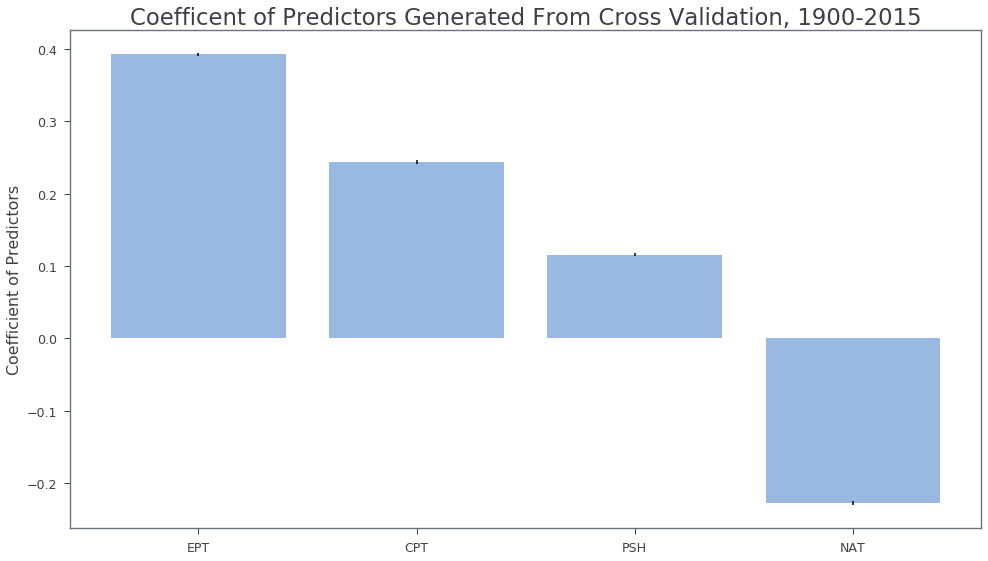

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


,Mean,95 confidence
EPT,0.392521,0.002176
CPT,0.243759,0.002383
PSH,0.115957,0.002060
NAT,-0.227935,0.002730


In [318]:
temp1 = []
temp2 = []
temp3 = []
temp4 = []

for x in range (2):
    temp1.append(EPTmodel[x+1])
    temp2.append(CPTmodel[x+1])
    temp3.append(PSHmodel[x+1])
    temp4.append(NATmodel[x+1])
pd.DataFrame.from_items([('EPT', temp1), ('CPT', temp2), ('PSH',temp3), ('NAT', temp4)], orient='index', columns=['Mean', '95 confidence'])

predictors = ['EPT', 'CPT', 'PSH', 'NAT']
x_pos = np.arange(len(predictors))
CTEs = [EPTregressionmean, CPTregressionmean, PSHregressionmean, NATregressionmean]
error = [EPTconfidence95, CPTconfidence95, PSHconfidence95, NATconfidence95]


fig, ax = plt.subplots(figsize=(14,8))
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Coefficient of Predictors', fontsize = 'large')
ax.set_xticks(x_pos)
ax.set_xticklabels(predictors)
ax.set_title('Coefficent of Predictors Generated From Cross Validation, 1900-2015',fontsize = 'xx-large')

# Save the figure and show
plt.tight_layout()
#plt.savefig('bar_plot_with_error_bars.png')
plt.show()
pd.DataFrame.from_items([('EPT', temp1), ('CPT', temp2), ('PSH',temp3), ('NAT', temp4)], orient='index', columns=['Mean', '95 confidence'])



In [319]:
# Copyright (c) 2020 Medha Palavalli.